**Criação do Schema para Organização do Projeto**

In [4]:
USE DW_38
GO
--CREATE SCHEMA STAGING
IF NOT EXISTS (SELECT 1 FROM sys.schemas WHERE name='STAGING')
   EXEC('CREATE SCHEMA STAGING');
    --CREATE SCHEMA STAGING
GO
--CREATE SCHEMA SILVER
IF NOT EXISTS (SELECT 1 FROM sys.schemas WHERE name='SILVER')
 EXEC('CREATE SCHEMA SILVER');
GO
--CREATE SCHEMA GOLD
IF NOT EXISTS (SELECT 1 FROM sys.schemas WHERE name='GOLD')
EXEC('CREATE SCHEMA GOLD');
GO
--CREATE SCHEMA LOGS
IF NOT EXISTS (SELECT 1 FROM sys.schemas WHERE name='LOGS')
    EXEC('CREATE SCHEMA LOGS');
GO


Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.812

**Criação Tabela de Log**

In [5]:
USE [DW_38]
GO

IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='LOG_CHALLENGE' AND xtype='U')

CREATE TABLE [DW_38].[LOGS].[LOG_CHALLENGE]
    (
        ID INT IDENTITY(1,1) NOT NULL PRIMARY KEY,
        NUMERO_ERRO INT,
        SERVERIDADE_ERRO INT,
        ESTADO_ERRO  INT,
        PROC_ERRO NVARCHAR(255),
        LINHA_ERRO INT,
        LINHAS_INSERT INT,
        LINHAS_UPDATE INT,
        LINHAS_DELETE INT,
        MSG_ERRO NVARCHAR(1000),
        SITUACAO NVARCHAR(10),
        PROCESSO NVARCHAR(30),
        DATA_INI DATETIME,
        DATA_FIM DATETIME  
    )

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.338

**CRIANDO UM PROCEDURE DE LOG PARA REUTILIZAÇÃO NOS PROCESSOS**

In [6]:
USE DW_38
GO
CREATE OR ALTER PROCEDURE [SP_INSERT_LOG_CHALLENGE]
    
    @LINHAS_INSERT INT,
    --@LINHAS_UPDATE INT,
    --@LINHAS_DELETE INT,
    @SITUACAO NVARCHAR(10),
    @PROCESSO NVARCHAR(30),
    @DATA_INI DATETIME,
    @DATA_FIM DATETIME  
AS
BEGIN
    SET NOCOUNT ON;

    INSERT INTO [DW_38].[LOGS].[LOG_CHALLENGE]
    (
        NUMERO_ERRO,
        SERVERIDADE_ERRO,
        ESTADO_ERRO,
        PROC_ERRO,
        LINHA_ERRO,
        LINHAS_INSERT,
      --  LINHAS_UPDATE,
      --  LINHAS_DELETE,
        MSG_ERRO,
        SITUACAO,
        PROCESSO,
        DATA_INI,
        DATA_FIM
    )
  SELECT   
        ERROR_NUMBER() AS ErrorNumber  ,
        ERROR_SEVERITY() AS ErrorSeverity  ,
        ERROR_STATE() AS ErrorState , 
        ERROR_LINE () AS ErrorLine , 
        ERROR_PROCEDURE() AS ErrorProcedure  ,
        @LINHAS_INSERT,
        --@LINHAS_UPDATE,
        --@LINHAS_DELETE,
        ERROR_MESSAGE() AS ErrorMessage,
        @SITUACAO,
        @PROCESSO,
        @DATA_INI,
        @DATA_FIM
    
END

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.324

**CRIANDO TABELA STAGING PARA RECEBER DADOS BRUTOS**

In [7]:
USE DW_38
GO

IF NOT EXISTS (SELECT * FROM sysobjects WHERE NAME='STG_DESPESAS' AND xtype='U')

CREATE TABLE [DW_38].[STAGING].[STG_DESPESAS](
    [ANO_MES] nvarchar(10),
    [COD_ORG_SUPERIOR] nvarchar(150),
    [NOME_ORG_SUPERIOR] nvarchar(150),
    [COD_ORG_SUBORDINADO] nvarchar(150),
    [NOME_ORG_SUBORDINADO] nvarchar(150),

    [COD_UNID_GESTORA] nvarchar(150),
    [NOME_UNID_GESTORA] nvarchar(150),
    [COD_GESTAO] nvarchar(150),
    [NOME_GESTAO] nvarchar(150),
    [COD_UNID_ORCAMENTARIA] nvarchar(150),

    [NOME_UNID_ORCAMENTARIA] nvarchar(150),
    [COD_FUNCAO] nvarchar(150),
    [NOME_FUNCAO] nvarchar(150),
    [COD_SUBFUNCAO] nvarchar(150),
    [NOME_SUBFUNCAO] nvarchar(150),

    [COD_PROG_ORCAMENTARIO] nvarchar(150),
    [NOME_PROG_ORCAMENTARIO] nvarchar(150),
    [COD_ACAO] nvarchar(150),
    [NOME_ACAO] nvarchar(250),
    [COD_PLAN_ORCAMENTARIO] nvarchar(150),

    [NOME_PLAN_ORCAMENTARIO] nvarchar(250),
    [COD_PROG_GOVERNO] nvarchar(150),
    [NOME_PROG_GOVERNO] nvarchar(250),
    [UF] nvarchar(50),
    [MUNICIPIO] nvarchar(150),

    [COD_SUBTITULO] nvarchar(150),
    [NOME_SUBTITULO] nvarchar(150),
    [COD_LOCALIZADOR] nvarchar(150),
    [NOME_LOCALIZADOR] nvarchar(150),
    [SGL_LOCALIZADOR] nvarchar(150),

    [DESCR_COMP_LOCALIZADOR] nvarchar(150),
    [COD_AUTOR_EMENDA] nvarchar(150),
    [NOME_AUTOR_EMENDA] nvarchar(150),
    [COD_CAT_ECONOMICA] nvarchar(150),
    [NOME_CAT_ECONOMICA] nvarchar(150),

    [COD_GRP_DESPESA] nvarchar(150),
    [NOME_GRP_DESPESA] nvarchar(150),
    [COD_ELEMENTO_DESPESA] nvarchar(150),
    [NOME_ELEMENTO_DESPESA] nvarchar(150),
    [COD_MODALIDADE_DESPESA] nvarchar(150),

    [NOME_MODALIDADE_DESPESA] nvarchar(150),
    [VALOR_EMPENHADO] nvarchar(150),
    [VALOR_LIQUIDADO] nvarchar(150),
    [VALOR_PAGO] nvarchar(150),
    [VALOR_RESTOS_INSCRITOS] nvarchar(150),

    [VALOR_RESTOS_CANCELADOS] nvarchar(150),
    [VALOR_RESTOS_PAGOS] nvarchar(150)
) ON [PRIMARY]
GO

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.321

**CARGA BULK OTIMIZADA**

In [8]:
BULK INSERT STAGING.STG_DESPESAS
FROM 'C:\DWE2023\desafio\fontes\202201_Despesas.csv'
WITH
(
	codepage='65001', 
    DATAFILETYPE ='char',       
	fieldterminator=';',
    rowterminator='\n',
	maxerrors=0,
	fire_triggers,
    firstrow=2
);

(37530 rows affected)

Total execution time: 00:00:03.154

In [9]:
BULK INSERT STAGING.STG_DESPESAS
FROM 'C:\DWE2023\desafio\fontes\202202_Despesas.csv'
WITH
(
	codepage='65001', 
    DATAFILETYPE ='char',       
	fieldterminator=';',
    rowterminator='\n',
	maxerrors=0,
	fire_triggers,
    firstrow=2
);

(50987 rows affected)

Total execution time: 00:00:03.482

In [10]:
BULK INSERT STAGING.STG_DESPESAS
FROM 'C:\DWE2023\desafio\fontes\202203_Despesas.csv'
WITH
(
	codepage='65001', 
    DATAFILETYPE ='char',       
	fieldterminator=';',
    rowterminator='\n',
	maxerrors=0,
	fire_triggers,
    firstrow=2
);

(57749 rows affected)

Total execution time: 00:00:05.068

**DIMENSÕES IDENTIFICADAS**

- **D\_Org\_Superior | Tabela dimensão do Órgão Superior ||** 
    
    - SK\_ORG\_SUPERIOR | código SK do Órgão Superior || INT, NOT NULL, AUTO INCREMENT
    - ID\_COD | Código de ID do Órgão Superior || INT, NOT NULL 
    - NOME\_ORG\_SUPERIOR | Nome do Órgão Superior || NVARCHAR (150), NOT NULL
    - DATA\_INI | Data de criação do item || DATATIME, NOT NULL
    - DATA\_FIM | Data de desativação do item || DATATIME
    - ATIVO | Booleano para o status de ativação do item || BIT
- **D\_Org\_Subordinado | Tabela dimensão do Órgão Superior ||** 
    
    - SK\_ORG\_SUBORDINADO | código SK do Órgão Subordinado|| INT, NOT NULL, AUTO INCREMENT
    - ID\_COD | Código de ID do Órgão Subordinado|| INT, NOT NULL 
    - NOME\_ORG\_SUBORDINADO | Nome do Órgão Subordinado|| NVARCHAR (150), NOT NULL
    - DATA\_INI | Data de criação do item || DATATIME, NOT NULL
    - DATA\_FIM  | Data de desativação do item || DATATIME
    - ATIVO | Booleano para o status de ativação do item || BIT
- **D\_Unid\_Gestora | Tabela dimensão da Unidade Gestora ||** 
    
    - SK\_UNID\_GESTORA | código SK da Unidade Gestora || INT, NOT NULL, AUTO INCREMENT
    - ID\_COD | Código de ID da Unidade Gestora || INT, NOT NULL 
    - NOME\_UNID\_GESTORA | Nome da Unidade Gestora || NVARCHAR (150), NOT NULL
    - DATA\_INI | Data de criação do item || DATATIME, NOT NULL
    - DATA\_FIM | Data de desativação do item || DATATIME
    - ATIVO | Booleano para o status de ativação do item || BIT
- **D\_Gestao | Tabela dimensão da Gestão ||** 
    
    - SK\_GESTAO | código SK da Gestão || INT, NOT NULL, AUTO INCREMENT
    - ID\_COD | Código de ID da Gestão || INT, NOT NULL UNIQUE
    - NOME\_GESTAO | Nome da Gestão || NVARCHAR (150), NOT NULL
    - DATA\_INI | Data de criação do item || DATATIME, NOT NULL
    - DATA\_FIM | Data de desativação do item || DATATIME
    - ATIVO | Booleano para o status de ativação do item || BIT
- **D\_Grp\_Despesa | Tabela dimensão do Grupo de Despesa ||** 
    
    - SK\_GRP\_DESPESA | código SK do Grupo de Despesa || INT, NOT NULL, AUTO INCREMENT
    - ID\_COD | Código de ID do Grupo de Despesa || INT, NOT NULL 
    - NOME\_GRP\_DESPESA | Nome do Grupo de Despesa || NVARCHAR (150), NOT NULL
    - DATA\_INI | Data de criação do item || DATATIME, NOT NULL
    - DATA\_FIM | Data de desativação do item || DATATIME
    - ATIVO | Booleano para o status de ativação do item || BIT

**FATO IDENTIFICADAS**

- **F\_Despesa | Tabela fato conforme o pedido para análise das despesas ||** 
    - SK\_TRANSACAO | código SK da transação || INT, NOT NULL, AUTO INCREMENT
    - SK\_DATA| Data  || INT, NOT NULL, 
    - SK\_ORG\_SUPERIOR | código SK do Órgão Superior || INT, NOT NULL, , 
    - SK\_ORG\_SUBORDINADO | código SK do Órgão Subordinado || INT, NOT NULL, , 
    - SK\_UNID\_GESTORA | código SK da Unidade Gestora || INT, NOT NULL, , 
    - SK\_GESTAO | código SK da Gestão || INT, NOT NULL, , 
    - SK\_GRP\_DESPESA | código SK do Grupo de Despesa || INT, NOT NULL, , 
    - VALOR\_EMPENHADO | Valor Empenhado || DECIMAL(15,2), NOT NULL, 
    - VALOR\_LIQUIDADO | Valor Liquidado || DECIMAL(15,2), NOT NULL, 
    - VALOR\_PAGO | Valor Pago || DECIMAL(15,2), NOT NULL

In [11]:
USE DW_38
GO

IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='D_Org_Superior' AND xtype='U')
-- CRIAÇÃO DA TABELA DIMENSÃO DO ORGÃO SUPERIOR
CREATE TABLE [DW_38].[SILVER].[D_Org_Superior](
    [SK_ORG_SUPERIOR] INT IDENTITY(1,1) NOT NULL,
    [ID_COD] [INT] NOT NULL,
    [NOME_ORG_SUPERIOR] NVARCHAR(150) NOT NULL,
    [DATA_INI] DATETIME NOT NULL,
    [DATA_FIM] DATETIME,
    [ATIVO] BIT
    PRIMARY KEY CLUSTERED(
        [SK_ORG_SUPERIOR] ASC
    ) WITH (PAD_INDEX = OFF, STATISTICS_NORECOMPUTE = OFF, IGNORE_DUP_KEY = OFF, ALLOW_ROW_LOCKS = ON, ALLOW_PAGE_LOCKS = ON, OPTIMIZE_FOR_SEQUENTIAL_KEY = OFF) ON [PRIMARY]
) ON [PRIMARY]
GO

IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='D_Org_Subordinado' AND xtype='U')
-- CRIAÇÃO DA TABELA DIMENSÃO DO ORGÃO SUBORDINADO
CREATE TABLE [DW_38].[SILVER].[D_Org_Subordinado](
    [SK_ORG_SUBORDINADO] INT IDENTITY(1,1) NOT NULL,
    [ID_COD] [INT] NOT NULL ,
    [NOME_ORG_SUBORDINADO] NVARCHAR(150) NOT NULL,
    [DATA_INI] DATETIME,
    [DATA_FIM] DATETIME,
    [ATIVO] BIT
    PRIMARY KEY CLUSTERED( [SK_ORG_SUBORDINADO] ASC)
        WITH (PAD_INDEX = OFF, STATISTICS_NORECOMPUTE = OFF, IGNORE_DUP_KEY = OFF, ALLOW_ROW_LOCKS = ON, ALLOW_PAGE_LOCKS = ON, OPTIMIZE_FOR_SEQUENTIAL_KEY = OFF) ON [PRIMARY]
) ON [PRIMARY]
GO

IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='D_Unid_Gestora' AND xtype='U')

-- CRIAÇÃO DA TABELA DIMENSÃO DA UNIDADE GESTORA
CREATE TABLE [DW_38].[SILVER].[D_Unid_Gestora](
    [SK_UNID_GESTORA] INT IDENTITY(1,1) NOT NULL,
    [ID_COD] [INT] NOT NULL ,
    [NOME_UNID_GESTORA] NVARCHAR(250) NOT NULL,
    [DATA_INI] DATETIME,
    [DATA_FIM] DATETIME,
    [ATIVO] BIT
    PRIMARY KEY CLUSTERED( [SK_UNID_GESTORA] ASC)
        WITH (PAD_INDEX = OFF, STATISTICS_NORECOMPUTE = OFF, IGNORE_DUP_KEY = OFF, ALLOW_ROW_LOCKS = ON, ALLOW_PAGE_LOCKS = ON, OPTIMIZE_FOR_SEQUENTIAL_KEY = OFF) ON [PRIMARY]
) ON [PRIMARY]
GO

IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='D_Gestao' AND xtype='U')

-- CRIAÇÃO DA TABELA DIMENSÃO DA GESTAO
CREATE TABLE [DW_38].[SILVER].[D_Gestao](
    [SK_GESTAO] INT IDENTITY(1,1) NOT NULL,
    [ID_COD] [INT] NOT NULL ,
    [NOME_GESTAO] NVARCHAR(150) NOT NULL,
    [DATA_INI] DATETIME,
    [DATA_FIM] DATETIME,
    [ATIVO] BIT
    PRIMARY KEY CLUSTERED( [SK_GESTAO] ASC)
        WITH (PAD_INDEX = OFF, STATISTICS_NORECOMPUTE = OFF, IGNORE_DUP_KEY = OFF, ALLOW_ROW_LOCKS = ON, ALLOW_PAGE_LOCKS = ON, OPTIMIZE_FOR_SEQUENTIAL_KEY = OFF) ON [PRIMARY]
) ON [PRIMARY]
GO

IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='D_Grp_Despesa' AND xtype='U')

-- CRIAÇÃO DA TABELA DIMENSÃO DO GRUPO DE DESPESA
CREATE TABLE [DW_38].[SILVER].[D_Grp_Despesa](
    [SK_GRP_DESPESA] INT IDENTITY(1,1) NOT NULL,
    [ID_COD] [INT] NOT NULL ,
    [NOME_GRP_DESPESA] NVARCHAR(150) NOT NULL,
    [DATA_INI] DATETIME,
    [DATA_FIM] DATETIME,
    [ATIVO] BIT
    PRIMARY KEY CLUSTERED( [SK_GRP_DESPESA] ASC)
        WITH (PAD_INDEX = OFF, STATISTICS_NORECOMPUTE = OFF, IGNORE_DUP_KEY = OFF, ALLOW_ROW_LOCKS = ON, ALLOW_PAGE_LOCKS = ON, OPTIMIZE_FOR_SEQUENTIAL_KEY = OFF) ON [PRIMARY]
) ON [PRIMARY]
GO

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.990

**Carga Dimensao** D\_Org\_Superior

In [12]:
USE DW_38
GO
DECLARE @LINHAS_INSERT INT
DECLARE @LINHAS_UPDATE INT
DECLARE @CONTA_LINHAS INT
DECLARE @VDATA_INI DATETIME
DECLARE @VDATA_FIM DATETIME
DECLARE @VPROCESSO VARCHAR(50)
    
BEGIN TRANSACTION
    BEGIN TRY
--2 Atribuido valor as variáveis
SET @CONTA_LINHAS=0
SET @LINHAS_INSERT=0
SET @VDATA_INI= GETDATE();
SET @VPROCESSO='CARGA DIMENSÃO ORGÃO SUPERIOR'


-- INICIA MERGE
INSERT INTO [DW_38].[SILVER].[D_Org_Superior](ID_COD, NOME_ORG_SUPERIOR, DATA_INI, DATA_FIM, ATIVO)
SELECT ID_COD, NOME_ORG_SUPERIOR, DATA_INI, DATA_FIM, ATIVO
FROM (
    MERGE [DW_38].[SILVER].[D_Org_Superior] AS DESTINO 
    
    USING (
        SELECT DISTINCT COD_ORG_SUPERIOR, NOME_ORG_SUPERIOR
        FROM [DW_38].[STAGING].[STG_DESPESAS] 
        WHERE COD_ORG_SUPERIOR IS NOT NULL 
            AND NOME_ORG_SUPERIOR IS NOT NULL
    ) AS ORIGEM
    
    ON DESTINO.[ID_COD] = ORIGEM.[COD_ORG_SUPERIOR]
        WHEN MATCHED 
            AND (DESTINO.NOME_ORG_SUPERIOR <> ORIGEM.NOME_ORG_SUPERIOR)
            AND DESTINO.ATIVO=1
        THEN
            UPDATE SET DESTINO.DATA_FIM = GETDATE(), DESTINO.ATIVO=0 
            
        WHEN NOT MATCHED
        THEN
            INSERT (ID_COD, NOME_ORG_SUPERIOR, DATA_INI, DATA_FIM, ATIVO) VALUES (ORIGEM.COD_ORG_SUPERIOR, ORIGEM.NOME_ORG_SUPERIOR, GETDATE(), NULL, 1)
        OUTPUT $action,
            ORIGEM.COD_ORG_SUPERIOR,
            ORIGEM.NOME_ORG_SUPERIOR,
            GETDATE(),
            NULL,
            1
)
as changes
(
    action,
    ID_COD,
    NOME_ORG_SUPERIOR,
    DATA_INI,
    DATA_FIM,
    ATIVO
)
WHERE ACTION='UPDATE';
-- FIM MERGE

-- CONTA LINHAS INSERIDAS    
SET @LINHAS_INSERT=@@ROWCOUNT
    
SET @VDATA_FIM=GETDATE()
--7 Executa a procedure de Log
EXECUTE SP_INSERT_LOG_CHALLENGE     
    @LINHAS_INSERT,  --INSERT
    'SUCESSO',
    @VPROCESSO,
    @VDATA_INI,
    @VDATA_FIM
--8  Executa o Committ
IF @@TRANCOUNT > 0
        COMMIT TRANSACTION;

--Fim try
END TRY
--
BEGIN CATCH
-- GRAVA LOG DE ERRO
    IF @@TRANCOUNT > 0
        ROLLBACK TRANSACTION
SET @VDATA_FIM=GETDATE()
EXECUTE SP_INSERT_LOG_CHALLENGE 
    @LINHAS_INSERT,  --INSERT
    'ERRO',
    @VPROCESSO,
    @VDATA_INI,
    @VDATA_FIM

END CATCH

Commands completed successfully.

(0 rows affected)

Total execution time: 00:00:00.623

**Carga Dimensao** D\_Org\_Subordinado

In [13]:
USE DW_38
GO
DECLARE @LINHAS_INSERT INT
DECLARE @LINHAS_UPDATE INT
DECLARE @CONTA_LINHAS INT
DECLARE @VDATA_INI DATETIME
DECLARE @VDATA_FIM DATETIME
DECLARE @VPROCESSO VARCHAR(50)
    
BEGIN TRANSACTION
    BEGIN TRY
--2 Atribuido valor as variáveis
SET @CONTA_LINHAS=0
SET @LINHAS_INSERT=0
SET @VDATA_INI= GETDATE();
SET @VPROCESSO='CARGA DIMENSAO ORG SUBORDINADO'


-- INICIA MERGE
INSERT INTO [DW_38].[SILVER].[D_Org_Subordinado](ID_COD, NOME_ORG_SUBORDINADO, DATA_INI, DATA_FIM, ATIVO)
SELECT ID_COD, NOME_ORG_SUBORDINADO, DATA_INI, DATA_FIM, ATIVO
FROM (
    MERGE [DW_38].[SILVER].[D_Org_Subordinado] AS DESTINO 
    
    USING (
        SELECT DISTINCT COD_ORG_SUBORDINADO, NOME_ORG_SUBORDINADO 
        FROM [DW_38].[STAGING].[STG_DESPESAS] 
        WHERE COD_ORG_SUBORDINADO IS NOT NULL 
            AND NOME_ORG_SUBORDINADO IS NOT NULL
    ) AS ORIGEM
        
    
    ON DESTINO.[ID_COD] = ORIGEM.[COD_ORG_SUBORDINADO]
        WHEN MATCHED 
            AND (DESTINO.NOME_ORG_SUBORDINADO <> ORIGEM.NOME_ORG_SUBORDINADO)
            AND DESTINO.ATIVO=1
        THEN
            UPDATE SET DESTINO.DATA_FIM = GETDATE(), DESTINO.ATIVO=0

        WHEN NOT MATCHED
        THEN
            INSERT (ID_COD, NOME_ORG_SUBORDINADO, DATA_INI, DATA_FIM, ATIVO) VALUES (ORIGEM.COD_ORG_SUBORDINADO, ORIGEM.NOME_ORG_SUBORDINADO, GETDATE(), NULL, 1)
        OUTPUT $action,
            ORIGEM.COD_ORG_SUBORDINADO,
            ORIGEM.NOME_ORG_SUBORDINADO,
            GETDATE(),
            NULL,
            1
            
)

as changes
(
    action,
    ID_COD,
    NOME_ORG_SUBORDINADO,
    DATA_INI,
    DATA_FIM,
    ATIVO
   
)
WHERE ACTION='UPDATE';


-- FIM MERGE

-- CONTA LINHAS INSERIDAS    
SET @LINHAS_INSERT=@@ROWCOUNT
SELECT @@ROWCOUNT    
SET @VDATA_FIM=GETDATE()
--7 Executa a procedure de Log
EXECUTE SP_INSERT_LOG_CHALLENGE     
    @LINHAS_INSERT,  --INSERT
    'SUCESSO',
    @VPROCESSO,
    @VDATA_INI,
    @VDATA_FIM
--8  Executa o Committ
IF @@TRANCOUNT > 0
    COMMIT TRANSACTION;

--Fim try
END TRY
--
BEGIN CATCH
-- GRAVA LOG DE ERRO
    IF @@TRANCOUNT > 0
        ROLLBACK TRANSACTION
SET @VDATA_FIM=GETDATE()
EXECUTE SP_INSERT_LOG_CHALLENGE 
    @LINHAS_INSERT,  --INSERT
    'ERRO',
    @VPROCESSO,
    @VDATA_INI,
    @VDATA_FIM

END CATCH

Commands completed successfully.

(0 rows affected)

Total execution time: 00:00:00.619

**Carga Dimensao** UNIDADE GESTORIA

In [14]:
USE DW_38
GO
DECLARE @LINHAS_INSERT INT
DECLARE @LINHAS_UPDATE INT
DECLARE @CONTA_LINHAS INT
DECLARE @VDATA_INI DATETIME
DECLARE @VDATA_FIM DATETIME
DECLARE @VPROCESSO VARCHAR(50)
    
BEGIN TRANSACTION
    BEGIN TRY
--2 Atribuido valor as variáveis
SET @CONTA_LINHAS=0
SET @LINHAS_INSERT=0
SET @VDATA_INI= GETDATE();
SET @VPROCESSO='CARGA DIMENSÃO UNIDADE GESTORA'

-- INICIA MERGE
INSERT INTO [DW_38].[SILVER].[D_Unid_Gestora](ID_COD, NOME_UNID_GESTORA, DATA_INI, DATA_FIM, ATIVO)
SELECT ID_COD, NOME_UNID_GESTORA, DATA_INI, DATA_FIM, ATIVO
FROM (
    MERGE [DW_38].[SILVER].[D_Unid_Gestora] AS DESTINO 
    
    USING (
        SELECT DISTINCT COD_UNID_GESTORA, NOME_UNID_GESTORA FROM [DW_38].[STAGING].[STG_DESPESAS]
        WHERE HASHBYTES('SHA2_256',CONCAT(COD_UNID_GESTORA, NOME_UNID_GESTORA)) NOT IN (SELECT 
        HASHBYTES('SHA2_256',CONCAT(ID_COD, NOME_UNID_GESTORA)) FROM [DW_38].[SILVER].[D_Unid_Gestora] )
    ) AS ORIGEM
    
    ON DESTINO.[ID_COD] = ORIGEM.[COD_UNID_GESTORA]
        WHEN MATCHED 
            AND (DESTINO.NOME_UNID_GESTORA <> ORIGEM.NOME_UNID_GESTORA)
            AND DESTINO.ATIVO=1
        THEN
            UPDATE SET DESTINO.DATA_FIM = GETDATE(),DESTINO.ATIVO=0

        WHEN NOT MATCHED
        THEN
            INSERT (ID_COD, NOME_UNID_GESTORA, DATA_INI, DATA_FIM, ATIVO) VALUES (ORIGEM.COD_UNID_GESTORA, ORIGEM.NOME_UNID_GESTORA, GETDATE(), NULL, 1)
        OUTPUT $action,
            ORIGEM.COD_UNID_GESTORA,
            ORIGEM.NOME_UNID_GESTORA,
            GETDATE(),
            NULL,
            1
)
as changes
(
    action,
    ID_COD,
    NOME_UNID_GESTORA,
    DATA_INI,
    DATA_FIM,
    ATIVO
)
WHERE ACTION='UPDATE';
-- FIM MERGE

-- CONTA LINHAS INSERIDAS    
SET @LINHAS_INSERT=@@ROWCOUNT
    
SET @VDATA_FIM=GETDATE()
--7 Executa a procedure de Log
EXECUTE SP_INSERT_LOG_CHALLENGE     
    @LINHAS_INSERT,  --INSERT
    'SUCESSO',
    @VPROCESSO,
    @VDATA_INI,
    @VDATA_FIM
--8  Executa o Committ
IF @@TRANCOUNT > 0
        COMMIT TRANSACTION;

--Fim try
END TRY
--
BEGIN CATCH
-- GRAVA LOG DE ERRO
    IF @@TRANCOUNT > 0
        ROLLBACK TRANSACTION
SET @VDATA_FIM=GETDATE()
EXECUTE SP_INSERT_LOG_CHALLENGE 
    @LINHAS_INSERT,  --INSERT
    'ERRO',
    @VPROCESSO,
    @VDATA_INI,
    @VDATA_FIM

END CATCH

Commands completed successfully.

(0 rows affected)

Total execution time: 00:00:01.076

**Carga Dimensao** GESTÃO

In [15]:
USE DW_38
GO
DECLARE @LINHAS_INSERT INT
DECLARE @LINHAS_UPDATE INT
DECLARE @CONTA_LINHAS INT
DECLARE @VDATA_INI DATETIME
DECLARE @VDATA_FIM DATETIME
DECLARE @VPROCESSO VARCHAR(50)
    
BEGIN TRANSACTION
    BEGIN TRY
--2 Atribuido valor as variáveis
SET @CONTA_LINHAS=0
SET @LINHAS_INSERT=0
SET @VDATA_INI= GETDATE();
SET @VPROCESSO='CARGA DIMENSÃO GESTÃO'

-- INICIA MERGE
INSERT INTO [DW_38].[SILVER].[D_Gestao](ID_COD, NOME_GESTAO, DATA_INI, DATA_FIM, ATIVO)
SELECT ID_COD, NOME_GESTAO, DATA_INI, DATA_FIM, ATIVO
FROM (
    MERGE [DW_38].[SILVER].[D_Gestao] AS DESTINO 
    
    USING (
        SELECT DISTINCT COD_GESTAO, NOME_GESTAO
        FROM [DW_38].[STAGING].[STG_DESPESAS] 
        WHERE COD_GESTAO IS NOT NULL 
            AND NOME_GESTAO IS NOT NULL
    ) AS ORIGEM
    
    ON DESTINO.[ID_COD] = ORIGEM.[COD_GESTAO]
        WHEN MATCHED 
            AND (DESTINO.NOME_GESTAO <> ORIGEM.NOME_GESTAO)
            AND DESTINO.ATIVO=1
        THEN
            UPDATE SET DESTINO.DATA_FIM = GETDATE(), DESTINO.ATIVO=0

        WHEN NOT MATCHED
        THEN
            INSERT (ID_COD, NOME_GESTAO, DATA_INI, DATA_FIM, ATIVO) VALUES (ORIGEM.COD_GESTAO, ORIGEM.NOME_GESTAO, GETDATE(), NULL, 1)
        OUTPUT $action,
            ORIGEM.COD_GESTAO,
            ORIGEM.NOME_GESTAO,
            GETDATE(),
            NULL,
            1
)
as changes
(
    action,
    ID_COD,
    NOME_GESTAO,
    DATA_INI,
    DATA_FIM,
    ATIVO
)
WHERE ACTION='UPDATE';
-- FIM DO MERGE

SET @LINHAS_INSERT=@@ROWCOUNT
    
SET @VDATA_FIM=GETDATE()
--7 Executa a procedure de Log
EXECUTE SP_INSERT_LOG_CHALLENGE     
    @LINHAS_INSERT,  --INSERT
    'SUCESSO',
    @VPROCESSO,
    @VDATA_INI,
    @VDATA_FIM
--8  Executa o Committ
IF @@TRANCOUNT > 0
        COMMIT TRANSACTION;

--Fim try
END TRY
--
BEGIN CATCH
-- GRAVA LOG DE ERRO
    IF @@TRANCOUNT > 0
        ROLLBACK TRANSACTION
SET @VDATA_FIM=GETDATE()
EXECUTE SP_INSERT_LOG_CHALLENGE 
    @LINHAS_INSERT,  --INSERT
    'ERRO',
    @VPROCESSO,
    @VDATA_INI,
    @VDATA_FIM

END CATCH

Commands completed successfully.

(0 rows affected)

Total execution time: 00:00:00.595

**Carga Dimensao** D\_Grp\_Despesa

In [16]:
USE DW_38
GO
DECLARE @LINHAS_INSERT INT
DECLARE @LINHAS_UPDATE INT
DECLARE @CONTA_LINHAS INT
DECLARE @VDATA_INI DATETIME
DECLARE @VDATA_FIM DATETIME
DECLARE @VPROCESSO VARCHAR(50)
    
BEGIN TRANSACTION
    BEGIN TRY
--2 Atribuido valor as variáveis
SET @CONTA_LINHAS=0
SET @LINHAS_INSERT=0
SET @VDATA_INI= GETDATE();
SET @VPROCESSO='CARGA DIMENSÃO GRUPO DE DESPESA'

-- INICIA MERGE
INSERT INTO [DW_38].[SILVER].[D_Grp_Despesa](ID_COD, NOME_GRP_DESPESA, DATA_INI, DATA_FIM, ATIVO)
SELECT ID_COD, NOME_GRP_DESPESA, DATA_INI, DATA_FIM, ATIVO
FROM (
    MERGE [DW_38].[SILVER].[D_Grp_Despesa] AS DESTINO 
    
    USING (
        SELECT DISTINCT COD_GRP_DESPESA, NOME_GRP_DESPESA
        FROM [DW_38].[STAGING].[STG_DESPESAS] 
        WHERE COD_GRP_DESPESA IS NOT NULL 
            AND NOME_GRP_DESPESA IS NOT NULL
    ) AS ORIGEM
    
    ON DESTINO.[ID_COD] = ORIGEM.[COD_GRP_DESPESA]
        WHEN MATCHED 
            AND (DESTINO.NOME_GRP_DESPESA <> ORIGEM.NOME_GRP_DESPESA)
            AND DESTINO.ATIVO=1
        THEN
            UPDATE SET DESTINO.DATA_FIM = GETDATE(), DESTINO.ATIVO=0

        WHEN NOT MATCHED
        THEN
            INSERT (ID_COD, NOME_GRP_DESPESA, DATA_INI, DATA_FIM, ATIVO) VALUES (ORIGEM.COD_GRP_DESPESA, ORIGEM.NOME_GRP_DESPESA, GETDATE(), NULL, 1)
        OUTPUT $action,
            ORIGEM.COD_GRP_DESPESA,
            ORIGEM.NOME_GRP_DESPESA,
            GETDATE(),
            NULL,
            1
)

as changes
(
    action,
    ID_COD,
    NOME_GRP_DESPESA,
    DATA_INI,
    DATA_FIM,
    ATIVO
)
WHERE ACTION='UPDATE';
-- TERMINA MERGE

SET @LINHAS_INSERT=@@ROWCOUNT
    
SET @VDATA_FIM=GETDATE()
--7 Executa a procedure de Log
EXECUTE SP_INSERT_LOG_CHALLENGE     
    @LINHAS_INSERT,  --INSERT
    'SUCESSO',
    @VPROCESSO,
    @VDATA_INI,
    @VDATA_FIM
--8  Executa o Committ
IF @@TRANCOUNT > 0
        COMMIT TRANSACTION;

--Fim try
END TRY
--
BEGIN CATCH
-- GRAVA LOG DE ERRO
    IF @@TRANCOUNT > 0
        ROLLBACK TRANSACTION
SET @VDATA_FIM=GETDATE()
EXECUTE SP_INSERT_LOG_CHALLENGE 
    @LINHAS_INSERT,  --INSERT
    'ERRO',
    @VPROCESSO,
    @VDATA_INI,
    @VDATA_FIM

END CATCH

Commands completed successfully.

(0 rows affected)

Total execution time: 00:00:00.593

**CRIAÇÃO DIMENSÃO TEMPO**

In [17]:
USE DW_38
GO
IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='DIM_TEMPO' AND xtype='U')
CREATE TABLE SILVER.DIM_TEMPO( 
 /* OBS 1: Nas dimensoes havera somente uma chave primaria simples com autoincremento e inteiro */
 SK_DATA int PRIMARY KEY,
 DATA date NOT NULL,
 ANO smallint NOT NULL,
 MES smallint NOT NULL,
 DIA smallint NOT NULL,
 MES_TEXTO VARCHAR(20),
 DIA_TEXTO VARCHAR(20),
 TRIMESTRE INT,
 ANO_MES VARCHAR(7),
)



Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.337

**CARGA DIMEMSÃO TEMPO**

In [18]:
USE DW_38
GO
DECLARE @LINHAS_INSERT INT
DECLARE @LINHAS_UPDATE INT
DECLARE @CONTA_LINHAS INT
DECLARE @VDATA_INI DATETIME
DECLARE @VDATA_FIM DATETIME
DECLARE @VPROCESSO VARCHAR(50)
    
BEGIN TRANSACTION
    BEGIN TRY
--2 Atribuido valor as variáveis
SET @CONTA_LINHAS=0
SET @VDATA_INI= GETDATE();
SET @VPROCESSO='CARGA DIMENSÃO TEMPO'

 
 DECLARE 
    @SK_DATA INT,
    @V_DATA_INI date, 
    @V_DATA_FIM date, 
    @V_DATA date, 
    @V_ANO smallint, 
    @V_MES smallint, 
    @V_DIA smallint, 
    @V_MES_TEXTO VARCHAR(20),
    @V_DIA_TEXTO VARCHAR(20),
    @V_TRIMESTRE smallint,
    @V_ANO_MES VARCHAR(7)
    

--Descobrindo a menor e maior ano para criar Range de Data
SELECT @V_DATA_INI =CAST(SUBSTRING(MIN(ANO_MES),1,4)+'0101' AS DATE) , 
       @V_DATA_FIM =CAST(SUBSTRING(MAX(ANO_MES),1,4)+'1231' AS DATE)  
FROM [STAGING].[STG_DESPESAS]

--LIMPA TABELA
TRUNCATE TABLE SILVER.DIM_TEMPO 
--set @dataInicial = '01/01/2012'
--set @dataFinal = '31/12/2012'

while @V_DATA_INI <= @V_DATA_FIM
begin
 set @SK_DATA = format(@V_DATA_INI,'yyyyMMdd')
 set @V_DATA = @V_DATA_INI
 set @V_ANO = year(@V_DATA)
 set @V_MES = month(@V_DATA)
 set @V_DIA = day(@V_DATA)
 SET @V_MES_TEXTO =FORMAT( @V_DATA, 'MMMM', 'pt-BR' )
 set @V_DIA_TEXTO = FORMAT( @V_DATA, 'dddd', 'pt-BR' )
 set @V_TRIMESTRE = DATEPART(q,@V_DATA)
 set @V_ANO_MES = FORMAT(@V_DATA, 'yyyy/MM', 'pt-BR' )
 --set @V_MES_TEXTO = DATENAME(MONTH,@V_DATA)
 --set @V_DIA_TEXTO = DATENAME(WEEKDAY,@V_DATA)
 

INSERT INTO SILVER.DIM_TEMPO (SK_DATA,DATA,ANO,MES,DIA,MES_TEXTO,DIA_TEXTO,TRIMESTRE,ANO_MES)
 SELECT @SK_DATA,
    @V_DATA ,
    @V_ANO,
    @V_MES,
    @V_DIA,
    @V_MES_TEXTO,
    @V_DIA_TEXTO,
    @V_TRIMESTRE,
    @V_ANO_MES



 SET @V_DATA_INI = dateadd(day,1,@V_DATA_INI) 
end
--fim while
SET @VDATA_FIM=GETDATE()
--7 Executa a procedure de Log
EXECUTE SP_INSERT_LOG_CHALLENGE     
    @LINHAS_INSERT,  --INSERT
    'SUCESSO',
    @VPROCESSO,
    @VDATA_INI,
    @VDATA_FIM
--8  Executa o Committ
IF @@TRANCOUNT > 0
        COMMIT TRANSACTION;

--Fim try
END TRY
--
BEGIN CATCH
-- GRAVA LOG DE ERRO
    IF @@TRANCOUNT > 0
        ROLLBACK TRANSACTION
SET @VDATA_FIM=GETDATE()
EXECUTE SP_INSERT_LOG_CHALLENGE 
    @LINHAS_INSERT,  --INSERT
    'ERRO',
    @VPROCESSO,
    @VDATA_INI,
    @VDATA_FIM

END CATCH

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.454

**Criação tabela Fato**

- F\_Despesa | Tabela fato conforme o pedido para análise das despesas
    - SK\_TRANSACAO| código SK da transação || INT, NOT NULL, AUTO INCREMENT
    - SK\_DATA | COD SK DATA || INT  NOT NULL, 
    - SK\_ORG\_SUPERIOR | código SK do Órgão Superior || INT, NOT NULL, UNIQUE, 
    - SK\_ORG\_SUBORDINADO | código SK do Órgão Subordinado || INT, NOT NULL, UNIQUE, 
    - SK\_UNID\_GESTORA | código SK da Unidade Gestora || INT, NOT NULL, UNIQUE, 
    - SK\_GESTAO | código SK da Gestão || INT, NOT NULL, UNIQUE, 
    - SK\_GRP\_DESPESA | código SK do Grupo de Despesa || INT, NOT NULL, UNIQUE, 
    - VALOR\_EMPENHADO | Valor Empenhado || DECIMAL(15,2), NOT NULL, 
    - VALOR\_LIQUIDADO | Valor Liquidado || DECIMAL(15,2), NOT NULL, 
    - VALOR\_PAGO | Valor Pago || DECIMAL(15,2), NOT NULL)

In [19]:
USE DW_38
GO

IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='F_Despesa' AND xtype='U')

CREATE TABLE [DW_38].[GOLD].[F_Despesa]
(
    [SK_TRANSACAO] INT IDENTITY(1,1) NOT NULL,
    [SK_DATA] INT NOT NULL,
    [SK_ORG_SUPERIOR] INT NOT NULL,
    [SK_ORG_SUBORDINADO] INT NOT NULL,
    [SK_UNID_GESTORA] INT NOT NULL,
    [SK_GESTAO] INT NOT NULL,
    [SK_GRP_DESPESA] INT NOT NULL,
    [VALOR_EMPENHADO] DECIMAL(15,2) NOT NULL,
    [VALOR_LIQUIDADO] DECIMAL(15,2) NOT NULL,
    [VALOR_PAGO] DECIMAL(15,2) NOT NULL
    

    PRIMARY KEY CLUSTERED([SK_TRANSACAO] ASC) 
        WITH (PAD_INDEX = OFF, STATISTICS_NORECOMPUTE = OFF, IGNORE_DUP_KEY = OFF, ALLOW_ROW_LOCKS = ON, ALLOW_PAGE_LOCKS = ON, OPTIMIZE_FOR_SEQUENTIAL_KEY = OFF) ON [PRIMARY]
) ON [PRIMARY]
GO

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.333

**CONSULTA BASE PARA CARGA FATO**

In [20]:
USE DW_38
GO

SELECT TOP 50
        CAST(REPLACE(STG_ORIGEM.ANO_MES,'/','')+'01' AS INT) SK_DATA,
        ORG_SUPERIOR.SK_ORG_SUPERIOR,
        ORG_SUBORDINADO.SK_ORG_SUBORDINADO,
        UNID_GESTORA.SK_UNID_GESTORA,
        GESTAO.SK_GESTAO,
        GRP_DESPESA.SK_GRP_DESPESA,
        CAST(REPLACE(STG_ORIGEM.VALOR_EMPENHADO,',','.') AS DECIMAL(15,2)) AS VALOR_EMPENHADO,
        CAST(REPLACE(STG_ORIGEM.VALOR_LIQUIDADO,',','.')  AS DECIMAL(15,2))VALOR_LIQUIDADO ,
        CAST(REPLACE(STG_ORIGEM.VALOR_PAGO,',','.')  AS DECIMAL(15,2)) VALOR_PAGO,
        STG_ORIGEM.VALOR_EMPENHADO,
        STG_ORIGEM.VALOR_LIQUIDADO,
        STG_ORIGEM.VALOR_PAGO

    FROM [DW_38].[STAGING].[STG_DESPESAS] STG_ORIGEM
    INNER JOIN [DW_38].[SILVER].[D_Org_Superior] ORG_SUPERIOR
    ON STG_ORIGEM.COD_ORG_SUPERIOR = ORG_SUPERIOR.ID_COD
    AND ORG_SUPERIOR.ATIVO=1

    INNER JOIN [DW_38].[SILVER].[D_Org_Subordinado] ORG_SUBORDINADO
    ON STG_ORIGEM.COD_ORG_SUBORDINADO = ORG_SUBORDINADO.ID_COD
    AND ORG_SUBORDINADO.ATIVO=1

    INNER JOIN [DW_38].[SILVER].[D_Unid_Gestora] UNID_GESTORA
    ON STG_ORIGEM.COD_UNID_GESTORA = UNID_GESTORA.ID_COD
    AND UNID_GESTORA.ATIVO=1

    INNER JOIN [DW_38].[SILVER].[D_Gestao] GESTAO
    ON STG_ORIGEM.COD_GESTAO = GESTAO.ID_COD
    AND GESTAO.ATIVO=1

    INNER JOIN [DW_38].[SILVER].[D_Grp_Despesa] GRP_DESPESA
    ON STG_ORIGEM.COD_GRP_DESPESA = GRP_DESPESA.ID_COD
    AND GRP_DESPESA.ATIVO=1 
    

GO

Commands completed successfully.

(0 rows affected)

Total execution time: 00:00:00.604

SK_DATA,SK_ORG_SUPERIOR,SK_ORG_SUBORDINADO,SK_UNID_GESTORA,SK_GESTAO,SK_GRP_DESPESA,VALOR_EMPENHADO,VALOR_LIQUIDADO,VALOR_PAGO,VALOR_EMPENHADO,VALOR_LIQUIDADO,VALOR_PAGO


**CARGA FATO**

In [21]:
USE DW_38
GO
DECLARE @LINHAS_INSERT INT
DECLARE @LINHAS_UPDATE INT
DECLARE @CONTA_LINHAS INT
DECLARE @VDATA_INI DATETIME
DECLARE @VDATA_FIM DATETIME
DECLARE @VPROCESSO VARCHAR(50)
    
BEGIN TRANSACTION
    BEGIN TRY
--2 Atribuido valor as variáveis
SET @CONTA_LINHAS=0
SET @LINHAS_INSERT=0
SET @VDATA_INI= GETDATE();
SET @VPROCESSO='CARGA FATO'

-- INICIA MERGE
MERGE [DW_38].[GOLD].[F_Despesa] AS DESTINO

USING (
    SELECT
        CAST(REPLACE(STG_ORIGEM.ANO_MES,'/','')+'01' AS INT) SK_DATA, -- CRIANDO SK DATA
        ORG_SUPERIOR.SK_ORG_SUPERIOR,
        ORG_SUBORDINADO.SK_ORG_SUBORDINADO,
        UNID_GESTORA.SK_UNID_GESTORA,
        GESTAO.SK_GESTAO,
        GRP_DESPESA.SK_GRP_DESPESA,
        CAST(REPLACE(STG_ORIGEM.VALOR_EMPENHADO,',','.') AS DECIMAL(15,2)) AS VALOR_EMPENHADO, --TRATANDO VALOR_EMPENHADO 
        CAST(REPLACE(STG_ORIGEM.VALOR_LIQUIDADO,',','.')  AS DECIMAL(15,2))VALOR_LIQUIDADO , --TRATANDO VALOR_LIQUIDADO
        CAST(REPLACE(STG_ORIGEM.VALOR_PAGO,',','.')  AS DECIMAL(15,2)) VALOR_PAGO -- TRATANDO VALOR_PAGO
       
    FROM [DW_38].[STAGING].[STG_DESPESAS] STG_ORIGEM
    INNER JOIN [DW_38].[SILVER].[D_Org_Superior] ORG_SUPERIOR
    ON STG_ORIGEM.COD_ORG_SUPERIOR = ORG_SUPERIOR.ID_COD
    AND ORG_SUPERIOR.ATIVO=1

    INNER JOIN [DW_38].[SILVER].[D_Org_Subordinado] ORG_SUBORDINADO
    ON STG_ORIGEM.COD_ORG_SUBORDINADO = ORG_SUBORDINADO.ID_COD
    AND ORG_SUBORDINADO.ATIVO=1

    INNER JOIN [DW_38].[SILVER].[D_Unid_Gestora] UNID_GESTORA
    ON STG_ORIGEM.COD_UNID_GESTORA = UNID_GESTORA.ID_COD
    AND UNID_GESTORA.ATIVO=1

    INNER JOIN [DW_38].[SILVER].[D_Gestao] GESTAO
    ON STG_ORIGEM.COD_GESTAO = GESTAO.ID_COD
    AND GESTAO.ATIVO=1

    INNER JOIN [DW_38].[SILVER].[D_Grp_Despesa] GRP_DESPESA
    ON STG_ORIGEM.COD_GRP_DESPESA = GRP_DESPESA.ID_COD
    AND GRP_DESPESA.ATIVO=1 
    
    ) AS ORIGEM

    --ON (DESTINO.SK_GESTAO = ORIGEM.SK_GESTAO AND DESTINO.SK_GRP_DESPESA = ORIGEM.SK_GRP_DESPESA)
    ON
    HASHBYTES('SHA2_256',CONCAT(DESTINO.SK_DATA,DESTINO.SK_ORG_SUPERIOR,DESTINO.SK_ORG_SUBORDINADO,DESTINO.SK_UNID_GESTORA,DESTINO.SK_GESTAO,DESTINO.SK_GRP_DESPESA,DESTINO.VALOR_EMPENHADO,DESTINO.VALOR_LIQUIDADO,DESTINO.VALOR_PAGO))=
    HASHBYTES('SHA2_256',CONCAT(ORIGEM.SK_DATA,ORIGEM.SK_ORG_SUPERIOR,ORIGEM.SK_ORG_SUBORDINADO,ORIGEM.SK_UNID_GESTORA,ORIGEM.SK_GESTAO,ORIGEM.SK_GRP_DESPESA,ORIGEM.VALOR_EMPENHADO,ORIGEM.VALOR_LIQUIDADO,ORIGEM.VALOR_PAGO))
  
    WHEN NOT MATCHED
    -- QUANDO NÃO HÁ, INSERIR O DADO
    THEN INSERT (SK_DATA, SK_ORG_SUPERIOR, SK_ORG_SUBORDINADO, SK_UNID_GESTORA, SK_GESTAO, SK_GRP_DESPESA, VALOR_EMPENHADO, VALOR_LIQUIDADO, VALOR_PAGO)
        VALUES(
            ORIGEM.SK_DATA,
            ORIGEM.SK_ORG_SUPERIOR,
            ORIGEM.SK_ORG_SUBORDINADO,
            ORIGEM.SK_UNID_GESTORA,
            ORIGEM.SK_GESTAO,
            ORIGEM.SK_GRP_DESPESA,
            ORIGEM.VALOR_EMPENHADO,
            ORIGEM.VALOR_LIQUIDADO,
            ORIGEM.VALOR_PAGO
        );
--FIM MERGE

--GRAVA LOG
SET @LINHAS_INSERT=@@ROWCOUNT
    
SET @VDATA_FIM=GETDATE()
--7 Executa a procedure de Log
EXECUTE SP_INSERT_LOG_CHALLENGE     
    @LINHAS_INSERT,  --INSERT
    'SUCESSO',
    @VPROCESSO,
    @VDATA_INI,
    @VDATA_FIM
--8  Executa o Committ
IF @@TRANCOUNT > 0
        COMMIT TRANSACTION;

--Fim try
END TRY
--
BEGIN CATCH
-- GRAVA LOG DE ERRO
    IF @@TRANCOUNT > 0
        ROLLBACK TRANSACTION
SET @VDATA_FIM=GETDATE()

EXECUTE SP_INSERT_LOG_CHALLENGE 
    @LINHAS_INSERT,  --INSERT
    'ERRO',
    @VPROCESSO,
    @VDATA_INI,
    @VDATA_FIM

END CATCH

Commands completed successfully.

(0 rows affected)

Total execution time: 00:00:00.692

**Star Schema**

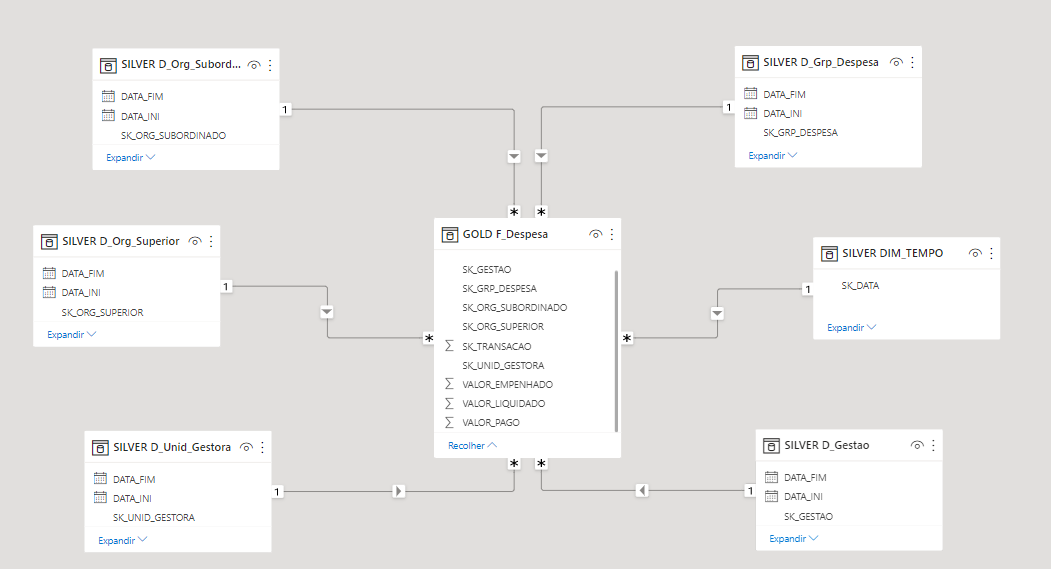

**<mark>\--- PARTE 2 - Conhecimentos de SQL e T-SQL(DML) ---</mark>**

**1- Qual o total em Jan/2022 Valor Pago (R$) para cada Órgão Superior?**

In [22]:
USE DW_38
GO

SELECT 
    TEMPO.ANO_MES AS ANO_MES, 
    SUPERIOR.ID_COD AS COD_ORG_SUPERIOR, 
    SUPERIOR.NOME_ORG_SUPERIOR, 
    FORMAT(SUM([FATO].VALOR_PAGO), 'C', 'pt-br') AS VALOR_PAGO 

FROM [DW_38].[GOLD].[F_Despesa] FATO
    INNER JOIN [DW_38].[SILVER].[D_Org_Superior] SUPERIOR 
    ON FATO.SK_ORG_SUPERIOR = SUPERIOR.SK_ORG_SUPERIOR
    INNER JOIN [DW_38].SILVER.DIM_TEMPO TEMPO 
    ON FATO.SK_DATA=TEMPO.SK_DATA
    WHERE TEMPO.MES = 1

    GROUP BY TEMPO.ANO_MES , SUPERIOR.ID_COD, SUPERIOR.NOME_ORG_SUPERIOR
    ORDER BY SUM([FATO].VALOR_PAGO) desc
GO

Commands completed successfully.

(0 rows affected)

Total execution time: 00:00:00.343

ANO_MES,COD_ORG_SUPERIOR,NOME_ORG_SUPERIOR,VALOR_PAGO


**2- Quais os top 10 Órgãos Superiores referente a Jan/2022 em Valor Pago (R$)**

In [23]:
USE DW_38
GO

SELECT TOP 10
    TEMPO.ANO_MES AS ANO_MES, 
    SUPERIOR.ID_COD AS COD_ORG_SUPERIOR, 
    SUPERIOR.NOME_ORG_SUPERIOR, 
    FORMAT(SUM([FATO].VALOR_PAGO), 'C', 'pt-br') AS VALOR_PAGO 

FROM [DW_38].[GOLD].[F_Despesa] FATO
    INNER JOIN [DW_38].[SILVER].[D_Org_Superior] SUPERIOR 
    ON FATO.SK_ORG_SUPERIOR = SUPERIOR.SK_ORG_SUPERIOR
    INNER JOIN [DW_38].SILVER.DIM_TEMPO TEMPO 
    ON FATO.SK_DATA=TEMPO.SK_DATA
    WHERE TEMPO.MES = 1

    GROUP BY TEMPO.ANO_MES , SUPERIOR.ID_COD, SUPERIOR.NOME_ORG_SUPERIOR
    ORDER BY SUM([FATO].VALOR_PAGO) desc
GO

Commands completed successfully.

(0 rows affected)

Total execution time: 00:00:00.327

ANO_MES,COD_ORG_SUPERIOR,NOME_ORG_SUPERIOR,VALOR_PAGO


**3- Qual o total no Trimestre do Valor Empenhado (R$) para cada Gestão?**

In [24]:
USE DW_38
GO

SELECT 
    GESTAO.ID_COD AS COD_GESTAO, 
    GESTAO.NOME_GESTAO, 
    FORMAT(SUM([FATO].VALOR_EMPENHADO), 'C', 'pt-br') AS VALOR_EMPENHADO 

FROM [DW_38].[GOLD].[F_Despesa] FATO
    INNER JOIN [DW_38].[SILVER].[D_Gestao] GESTAO 
        ON FATO.SK_GESTAO = GESTAO.SK_GESTAO
     INNER JOIN [DW_38].[SILVER].[DIM_TEMPO] TEMPO 
        ON FATO.SK_DATA=TEMPO.SK_DATA
    WHERE TEMPO.TRIMESTRE = 1    
    GROUP BY GESTAO.ID_COD, GESTAO.NOME_GESTAO
    ORDER BY SUM([FATO].VALOR_EMPENHADO) DESC
GO

Commands completed successfully.

(0 rows affected)

Total execution time: 00:00:00.332

COD_GESTAO,NOME_GESTAO,VALOR_EMPENHADO


**4- Quais as Top 10 Gestão no Trimestre referente a valor empenhado?**

In [25]:
USE DW_38
GO

SELECT TOP 10
    GESTAO.ID_COD AS COD_GESTAO, 
    GESTAO.NOME_GESTAO, 
    FORMAT(SUM([FATO].VALOR_EMPENHADO), 'C', 'pt-br') AS VALOR_EMPENHADO 

FROM [DW_38].[GOLD].[F_Despesa] FATO
    INNER JOIN [DW_38].[SILVER].[D_Gestao] GESTAO 
        ON FATO.SK_GESTAO = GESTAO.SK_GESTAO
     INNER JOIN [DW_38].[SILVER].[DIM_TEMPO] TEMPO 
        ON FATO.SK_DATA=TEMPO.SK_DATA
    WHERE TEMPO.TRIMESTRE = 1    
    GROUP BY GESTAO.ID_COD, GESTAO.NOME_GESTAO
    ORDER BY SUM([FATO].VALOR_EMPENHADO) DESC
GO

Commands completed successfully.

(0 rows affected)

Total execution time: 00:00:00.334

COD_GESTAO,NOME_GESTAO,VALOR_EMPENHADO


**5- Qual o total mês a mês de Valor Liquidado (R$) para cada Grupo de Despesa?**

In [26]:
USE DW_38
GO

SELECT 
    TEMPO.ANO_MES AS MES, 
    DESPESA.ID_COD AS COD_GRP_DESPESA, 
    DESPESA.NOME_GRP_DESPESA, 
    FORMAT(SUM([FATO].VALOR_LIQUIDADO), 'C', 'pt-br') AS VALOR_LIQUIDADO 

FROM [DW_38].[GOLD].[F_Despesa] FATO
    INNER JOIN [DW_38].[SILVER].[D_Grp_Despesa] DESPESA 
        ON FATO.SK_GRP_DESPESA = DESPESA.SK_GRP_DESPESA
     INNER JOIN [DW_38].[SILVER].[DIM_TEMPO] TEMPO 
        ON FATO.SK_DATA=TEMPO.SK_DATA    

    GROUP BY TEMPO.ANO_MES, DESPESA.ID_COD, DESPESA.NOME_GRP_DESPESA
    ORDER BY DESPESA.ID_COD ASC, TEMPO.ANO_MES ASC
GO

Commands completed successfully.

(0 rows affected)

Total execution time: 00:00:00.337

MES,COD_GRP_DESPESA,NOME_GRP_DESPESA,VALOR_LIQUIDADO


**6- Quais os TOP 10 Grupo de Despesas referente a valor Liquidado (R$) em Fev/2022?**

In [27]:
USE DW_38
GO

SELECT TOP 10
    TEMPO.ANO_MES AS MES, 
    DESPESA.ID_COD AS COD_GRP_DESPESA, 
    DESPESA.NOME_GRP_DESPESA, 
    FORMAT(SUM([FATO].VALOR_LIQUIDADO), 'C', 'pt-br') AS VALOR_LIQUIDADO 

FROM [DW_38].[GOLD].[F_Despesa] FATO
    INNER JOIN [DW_38].[SILVER].[D_Grp_Despesa] DESPESA 
        ON FATO.SK_GRP_DESPESA = DESPESA.SK_GRP_DESPESA
     INNER JOIN [DW_38].[SILVER].[DIM_TEMPO] TEMPO 
        ON FATO.SK_DATA=TEMPO.SK_DATA    
  WHERE TEMPO.ANO=2022
    AND TEMPO.MES=2
    GROUP BY TEMPO.ANO_MES, DESPESA.ID_COD, DESPESA.NOME_GRP_DESPESA
    ORDER BY  SUM([FATO].VALOR_LIQUIDADO) DESC
GO

Commands completed successfully.

(0 rows affected)

Total execution time: 00:00:00.330

MES,COD_GRP_DESPESA,NOME_GRP_DESPESA,VALOR_LIQUIDADO


**7- Qual a variação %(MoM) de Valor Empenhado (R$) de Mar/2022 para Fev/2022 por Unidade Gestora**

In [28]:
USE DW_38
GO

-- CRIAÇÃO DA TABELA COM A SOMA DO VALOR EMPENHADO POR UNIDADE GESTORA NO MÊS DE FEVEREIRO
WITH ORG_SUP_EMPENHADO AS (
    SELECT GESTORA.ID_COD AS COD_UNID_GESTORA, GESTORA.SK_UNID_GESTORA, GESTORA.NOME_UNID_GESTORA, 
    SUM([FATO].VALOR_EMPENHADO) AS VALOR_EMPENHADO , 
    SUM([FATO].VALOR_EMPENHADO) AS VALOR_DIV
    FROM [DW_38].[GOLD].[F_Despesa] FATO
    INNER JOIN [DW_38].[SILVER].[D_Unid_Gestora] GESTORA 
        ON [FATO].SK_UNID_GESTORA = GESTORA.SK_UNID_GESTORA

    INNER JOIN [DW_38].[SILVER].[DIM_TEMPO] TEMPO 
        ON FATO.SK_DATA=TEMPO.SK_DATA    
        WHERE TEMPO.ANO=2022
        AND TEMPO.MES=2

    GROUP BY TEMPO.[ANO_MES], GESTORA.SK_UNID_GESTORA, GESTORA.ID_COD, GESTORA.NOME_UNID_GESTORA    
)

SELECT 
    GESTORA.ID_COD AS COD_UNID_GESTORA, 
    GESTORA.NOME_UNID_GESTORA,    
    FORMAT(ORG_SUP_EMPENHADO.VALOR_EMPENHADO, 'C', 'pt-br') AS VALOR_EMPENHADO_FEV,
    FORMAT(SUM([FATO].VALOR_EMPENHADO), 'C', 'pt-br') AS VALOR_EMPENHADO_MAR,
    CASE WHEN ORG_SUP_EMPENHADO.VALOR_DIV = 0 THEN NULL ELSE
    FORMAT(((SUM([FATO].VALOR_EMPENHADO)-ORG_SUP_EMPENHADO.VALOR_EMPENHADO)/ORG_SUP_EMPENHADO.VALOR_DIV), 'P') END AS PORCENTAGEM_MOM,
    FORMAT((SUM([FATO].VALOR_EMPENHADO)-ORG_SUP_EMPENHADO.VALOR_EMPENHADO), 'C', 'pt-br') AS VARIACAO_VALOR_EMPENHADO 

FROM [DW_38].[GOLD].[F_Despesa] FATO
    INNER JOIN [DW_38].[SILVER].[D_Unid_Gestora] GESTORA 
        ON [FATO].SK_UNID_GESTORA = GESTORA.SK_UNID_GESTORA
    INNER JOIN ORG_SUP_EMPENHADO 
        ON [FATO].SK_UNID_GESTORA = ORG_SUP_EMPENHADO.SK_UNID_GESTORA
    INNER JOIN [DW_38].[SILVER].[DIM_TEMPO] TEMPO 
        ON FATO.SK_DATA=TEMPO.SK_DATA    
        WHERE TEMPO.ANO=2022
        AND TEMPO.MES=3
    
    GROUP BY GESTORA.ID_COD, GESTORA.NOME_UNID_GESTORA, ORG_SUP_EMPENHADO.VALOR_EMPENHADO, ORG_SUP_EMPENHADO.VALOR_DIV
    ORDER BY VARIACAO_VALOR_EMPENHADO DESC
GO


Commands completed successfully.

(0 rows affected)

Total execution time: 00:00:00.324

COD_UNID_GESTORA,NOME_UNID_GESTORA,VALOR_EMPENHADO_FEV,VALOR_EMPENHADO_MAR,PORCENTAGEM_MOM,VARIACAO_VALOR_EMPENHADO


**8- Retorno o maior Valor Empenhado (R$) de Grupo de despesas em Fev/2022 para cada Órgão Superior**

In [29]:
USE DW_38
GO

-- TABELA COM PARTIÇÃO POR ÓRGÃO SUPERIOR 
WITH ORG_SUP_EMPENHADO AS (
    SELECT DISTINCT RANK() OVER (PARTITION BY SK_ORG_SUPERIOR ORDER BY SUM(VALOR_EMPENHADO) DESC) AS RANK_SUP_EMPENHADO, 
    TEMPO.SK_DATA,TEMPO.ANO_MES, SK_ORG_SUPERIOR, SK_GRP_DESPESA, SUM(VALOR_EMPENHADO) AS VALOR_SUM_EMPENHADO 

    FROM [DW_38].[GOLD].[F_Despesa] FATO
     INNER JOIN [DW_38].[SILVER].[DIM_TEMPO] TEMPO 
        ON FATO.SK_DATA=TEMPO.SK_DATA    
        WHERE TEMPO.ANO=2022
          AND TEMPO.MES = 2
            GROUP BY TEMPO.SK_DATA,TEMPO.ANO_MES, SK_ORG_SUPERIOR, SK_GRP_DESPESA
)

SELECT 
    TEMPO.ANO_MES AS ANO_MES, 
    SUPERIOR.ID_COD AS COD_ORD_SUPERIOR, 
    SUPERIOR.NOME_ORG_SUPERIOR, 
    DESPESA.ID_COD AS COD_GRP_DESPESA, 
    DESPESA.NOME_GRP_DESPESA, 
    FORMAT(MAX([ORG_SUP_EMPENHADO].VALOR_SUM_EMPENHADO), 'C', 'pt-br') AS MAIOR_VALOR_EMPENHADO 
FROM [ORG_SUP_EMPENHADO]
    INNER JOIN [DW_38].[SILVER].[D_Org_Superior] SUPERIOR 
        ON [ORG_SUP_EMPENHADO].SK_ORG_SUPERIOR = SUPERIOR.SK_ORG_SUPERIOR
    INNER JOIN [DW_38].[SILVER].[D_Grp_Despesa] DESPESA 
        ON [ORG_SUP_EMPENHADO].SK_GRP_DESPESA = DESPESA.SK_GRP_DESPESA
     INNER JOIN [DW_38].[SILVER].[DIM_TEMPO] TEMPO 
        ON ORG_SUP_EMPENHADO.SK_DATA=TEMPO.SK_DATA       
    WHERE TEMPO.MES = 2 
    AND TEMPO.ANO=2022
    AND RANK_SUP_EMPENHADO = 1
    GROUP BY [TEMPO].ANO_MES, SUPERIOR.ID_COD, SUPERIOR.NOME_ORG_SUPERIOR, DESPESA.ID_COD, DESPESA.NOME_GRP_DESPESA
    ORDER BY SUM([ORG_SUP_EMPENHADO].VALOR_SUM_EMPENHADO) ASC

Commands completed successfully.

(0 rows affected)

Total execution time: 00:00:00.333

ANO_MES,COD_ORD_SUPERIOR,NOME_ORG_SUPERIOR,COD_GRP_DESPESA,NOME_GRP_DESPESA,MAIOR_VALOR_EMPENHADO


**9- Retorne o % de Valor Pago (R$) sobre o total, por Gestão Fev/2022**

In [30]:
USE DW_38
GO
--DECLARA VARIAVEL DE VALOR TOTAL
DECLARE @V_TOTAL_GERAL FLOAT
--ATRIBUI VALOR A TOTAL A VARIAVEL
 SET @V_TOTAL_GERAL = (SELECT SUM([FATO].VALOR_PAGO) FROM [DW_38].[GOLD].[F_Despesa] FATO 
                               INNER JOIN SILVER.DIM_TEMPO TEMPO
                               ON FATO.SK_DATA=TEMPO.SK_DATA
                               WHERE TEMPO.ANO=2022
                               AND TEMPO.MES=2)

SELECT FORMAT(@V_TOTAL_GERAL,'C', 'pt-br') AS 'TOTAL GERAL'

SELECT 
    TEMPO.ANO_MES, 
    GESTAO.ID_COD AS COD_GESTAO, 
    GESTAO.NOME_GESTAO, 
    FORMAT(SUM([FATO].VALOR_PAGO), 'C', 'pt-br') AS VALOR_PAGO ,
    FORMAT(SUM([FATO].VALOR_PAGO)/@V_TOTAL_GERAL, 'P') AS PORCENTAGEM
    

FROM [DW_38].[GOLD].[F_Despesa] FATO
    INNER JOIN [DW_38].[SILVER].[D_Gestao] GESTAO 
        ON FATO.SK_GESTAO = GESTAO.SK_GESTAO
    INNER JOIN SILVER.DIM_TEMPO TEMPO
        ON FATO.SK_DATA=TEMPO.SK_DATA
           WHERE TEMPO.ANO=2022
           AND TEMPO.MES=2    
    
    GROUP BY TEMPO.ANO_MES, GESTAO.ID_COD, GESTAO.NOME_GESTAO
    ORDER BY SUM([FATO].VALOR_PAGO) DESC
GO

Commands completed successfully.

(1 row affected)

(0 rows affected)

Total execution time: 00:00:00.362

TOTAL GERAL
NULL


ANO_MES,COD_GESTAO,NOME_GESTAO,VALOR_PAGO,PORCENTAGEM


**10- Retorne o valor média de Valor Pago (R$) por despesa agrupado por Gestão**

In [31]:
USE DW_38
GO

-- TABELA COM PARTIÇÃO POR GESTAO MES A MES
WITH GEST_PAGO AS (
    SELECT TEMPO.ANO_MES, FATO.SK_GESTAO, SK_GRP_DESPESA, SUM(VALOR_PAGO) AS VALOR_SUM_PAGO 
    FROM [DW_38].[GOLD].[F_Despesa] FATO
        INNER JOIN SILVER.DIM_TEMPO TEMPO
         ON FATO.SK_DATA=TEMPO.SK_DATA
            GROUP BY TEMPO.ANO_MES, FATO.SK_GESTAO, FATO.SK_GRP_DESPESA
)

SELECT 
    GESTAO.ID_COD AS COD_GESTAO, 
    GESTAO.NOME_GESTAO, 
    DESPESA.ID_COD AS COD_GRP_DESPESA, 
    DESPESA.NOME_GRP_DESPESA, 
    FORMAT(AVG([GEST_PAGO].VALOR_SUM_PAGO), 'C', 'pt-br') AS MEDIA_VALOR_PAGO 
FROM [GEST_PAGO]
    INNER JOIN [DW_38].[SILVER].[D_Gestao] GESTAO ON [GEST_PAGO].SK_GESTAO = GESTAO.SK_GESTAO
    INNER JOIN [DW_38].[SILVER].[D_Grp_Despesa] DESPESA ON [GEST_PAGO].SK_GRP_DESPESA = DESPESA.SK_GRP_DESPESA
    GROUP BY GESTAO.ID_COD, GESTAO.NOME_GESTAO, DESPESA.ID_COD, DESPESA.NOME_GRP_DESPESA
    ORDER BY GESTAO.NOME_GESTAO ASC, SUM([GEST_PAGO].VALOR_SUM_PAGO) ASC

Commands completed successfully.

(0 rows affected)

Total execution time: 00:00:00.342

COD_GESTAO,NOME_GESTAO,COD_GRP_DESPESA,NOME_GRP_DESPESA,MEDIA_VALOR_PAGO
